In [1]:
import sys
# from python_environment_check import check_packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os.path import expanduser as ospath
import csv
import re
import locale
from datetime import datetime
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display, HTML
display("text/html", "<style>.container { width:550% !important; }</style>")
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
import sys
#from python_environment_check import check_packages
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import (
    LogisticRegression,
    PassiveAggressiveClassifier,
    Perceptron,
    SGDClassifier,
)
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm

class LogisticRegressionGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
 
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
         return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)



def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    #x = np.arange(10)
    #ys = [i+x+(i*x)**2 for i in range(10)]
    #colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    
    # setup marker generator and color map
    #https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers
    markers = ('o', 's', '^', 'v', '<', '>','p', '*', '+', 'd', 'h','8','x','D','v',',','1','2','3','4')
    #https://matplotlib.org/stable/gallery/color/named_colors.html
    colors = ('red', 'blue', 'cyan', 'maroon','yellow','lime','violet','peru', 'lightgreen','tomato', 'gray','deeppink','purple','olive','lightcoral','brown','coral','darkorange','darkgreen','darkmagenta')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.figure(figsize=(10, 6))

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

        
def decision_Perceptron(X,y,mdl,clf): 

    # Convert y to a 1D array using ravel()
    y = y.to_numpy().ravel()


    print('Class labels:', np.unique(y))
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=1, stratify=y)
#Y = y.astype(np.int32)
#print('Labels counts in y:', np.bincount(Y[:,0]))
#YTR = y_train.astype(np.int32)
#print('Labels counts in y_train:', np.bincount(YTR[:,0]))
#XTS = y_test.astype(np.int32)
#print('Labels counts in y_test:', np.bincount(XTS[:,0]))
    from sklearn.preprocessing import StandardScaler

#    sc = StandardScaler()
#    sc = MinMaxScaler()
#    sc.fit(X_train)
#    X_train_std = sc.transform(X_train)
#    X_test_std = sc.transform(X_test)
    
    X_train_std = X_train
    X_test_std = X_test

    current_time = datetime.now()
    if mdl == 'SGD':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'ASGD':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'Perceptron':        
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'Passive-Aggressive I':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )        
    if mdl == 'Passive-Aggressive II':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )        
    if mdl == 'SAG':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )    
    if mdl == 'ppn':
        from sklearn.linear_model import Perceptron
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'knn':        
        from sklearn.neighbors import KNeighborsClassifier
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )    
    if mdl == 'lrgd':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )        
        X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
        y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    if mdl == 'svm':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )
    if mdl == 'lr':
        print('Model: ', mdl, ' start: ', current_time.strftime("%H:%M:%S.%f")[:-3] )    
        
         
#   Main model running        
        
    classifier = clf
    classifier.fit(X_train, y_train)
 
    y_pred = classifier.predict(X_test_std)
    print('Model: ',mdl,'Misclassified examples: %d' % (y_test != y_pred).sum())
    from sklearn.metrics import accuracy_score
    print('Model: ',mdl,'Accuracy: %.3f' % accuracy_score(y_test, y_pred))

    if mdl == 'ppn':
        print('Training Accuracy: %.3f' % classifier.score(X_train_std, y_train))  
        print('Test Accuracy: %.3f' % classifier.score(X_test_std, y_test))
      
    if mdl == 'lr':
        print('Training Accuracy: %.3f' % classifier.score(X_train_std, y_train))        
        print('Test Accuracy: %.3f' % classifier.score(X_test_std, y_test))  
        # Note that C=1.0 is the default. You can increase
       
        
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    return X_combined_std,y_combined, classifier, current_time



from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score




'text/html'

'<style>.container { width:550% !important; }</style>'

In [2]:
df = pd.DataFrame()
df = pd.read_csv('04.elemzett_joined_versenyadatok.temp1.csv', sep=';', encoding='utf-8')
df.head(5)

,when,place,division,who,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,...,L_count,T_count,W_count,W_max,dogcl,wind_kphcl,temp_ccl,humcl,whenlabel,Category
0,15,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:23:20,T
1,15,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:23:20,T
2,15,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:23:20,T
3,16,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:24:51,T
4,16,1,1,1,TM800418,Dexter,Kooikerhondje,kan,1,2010-02-14,...,8.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,2023-04-22 11:24:51,T


In [3]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
#    count number of rows with missing values
#    n_miss = df[[i]].isnull().sum()
    n_miss = df.iloc[:, i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))  
    # summarize the number of unique values in each column

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 0 (0.0%)
> 31, Missing: 0 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 0 (0.0%)
> 41, Missing: 0 (0.0%)
> 

In [4]:
#print("Column names:", df.columns.tolist())
column_dict = {idx: col_name for idx, col_name in enumerate(df.columns)}
print("Column names dictionary:")
print(column_dict)

code_label_dict = dict(zip(df['wind_dir'], df['wind_dirlabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['WLT'], df['WLTlabel']))
print(code_label_dict)
#code_label_dict = dict(zip(df['ivar'], df['ivarlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(df['place'], df['placelabel']))
print(code_label_dict)
#code_label_dict = dict(zip(df['chip_szam'], df['chip_szamlabel']))
#print(code_label_dict)
code_label_dict = dict(zip(df['name'], df['namelabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['who'], df['wholabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['colour'], df['colourlabel']))
print(code_label_dict)
code_label_dict = dict(zip(df['datum'], df['datumlabel']))
print(code_label_dict)



Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: 'colourlabel', 27: 'WLTlabel', 28: 'namelabel', 29: 'wholabel', 30: 'time', 31: 'temp_c', 32: 'wind_kph', 33: 'wind_degree', 34: 'wind_dir', 35: 'will_it_rain', 36: 'chance_of_rain', 37: 'humidity', 38: 'datum', 39: 'datumlabel', 40: 'wind_dirlabel', 41: 'placelabel', 42: 'L_count', 43: 'T_count', 44: 'W_count', 45: 'W_max', 46: 'dogcl', 47: 'wind_kphcl', 48: 'temp_ccl', 49: 'humcl', 50: 'whenlabel', 51: 'Category'}
{12: 'W', 14: 'WSW', 13: 'WNW', 6: 'NW', 5: 'NNW', 2: 'N', 4: 'NNE', 1: 'ESE', 3: 'NE', 0: 'E', 9: 'SSE', 8: 'SE', 11: 'SW', 7: 'S', 10: 'SSW'}
{0: 'L', 2: 'W', 1: 'T'}
{1: 'Herolt

Class labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Model:  SGD  start:  14:36:39.785


C:\Users\zertr\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\zertr\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Model:  SGD Misclassified examples: 753
Model:  SGD Accuracy: 0.185


C:\Users\zertr\AppData\Local\Temp\ipykernel_13820\2108013601.py:129: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\zertr\AppData\Local\Temp\ipykernel_13820\2108013601.py:129: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\zertr\AppData\Local\Temp\ipykernel_13820\2108013601.py:129: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\zertr\AppData\Local\Temp\ipykernel_13820\2108013601.py:129: UserWarning: You passed a edgecolor/edgecolors ('bla

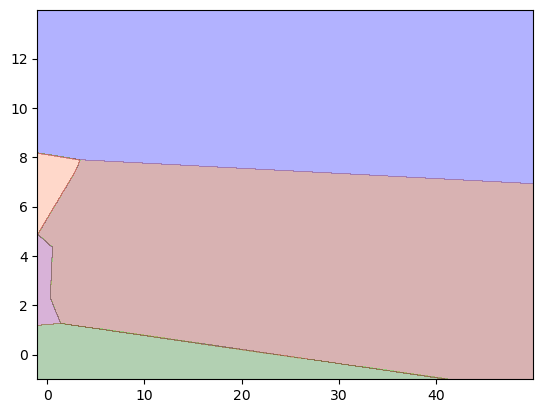

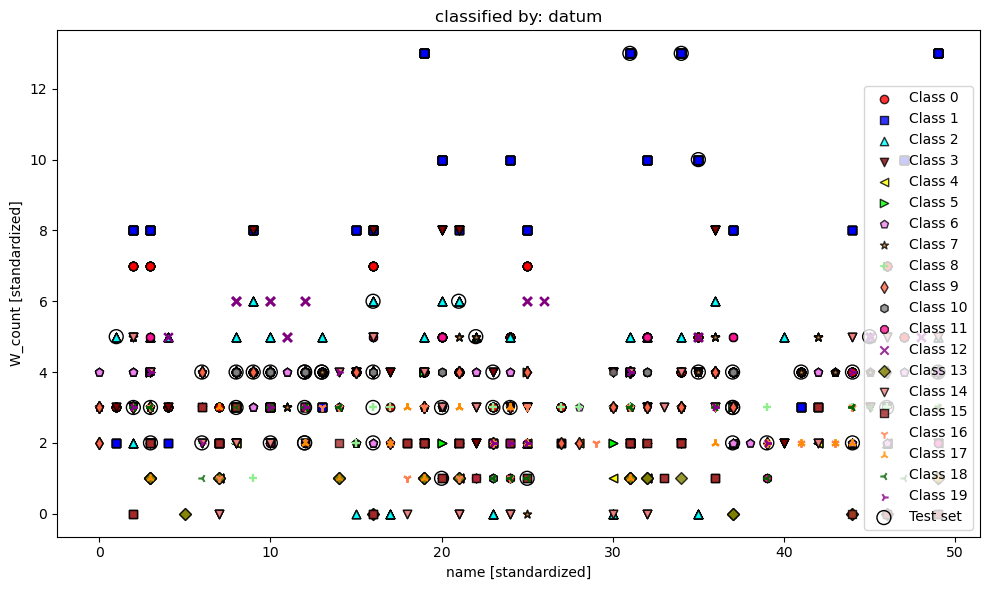

Model:  SGD  delta:  0:00:04.424706


In [48]:
# Number of rounds to fit and evaluate an estimator.
rounds = 10

X = df.iloc[:, [15,44]]  # name, W_count
y = df.iloc[:, [38]] #datum


classifiers = [
    ("SGD", SGDClassifier(max_iter=110)),
#    ("ASGD", SGDClassifier(max_iter=110, average=True)),
#    ("Perceptron", Perceptron(max_iter=110)),
#    ("Passive-Aggressive I",PassiveAggressiveClassifier(max_iter=110, loss="hinge", C=1.0, tol=1e-4),),
#    ("Passive-Aggressive II",PassiveAggressiveClassifier(max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4),),
#    ("SAG",LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),),
#    ("forest", RandomForestClassifier(n_estimators=25,random_state=1,n_jobs=2)),
#    ("svm", SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)),
#    ("lrgd", LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)),
#    ("knn", KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')),
#    ("ppn", Perceptron(eta0=0.1, random_state=1)),
#    ("lr", LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')),
]

for mdl, clf in classifiers:
    #print("training %s" % name)
    X_combined_std, y_combined, mdlobj, start_time = decision_Perceptron(X,y,mdl,clf)

    plot_decision_regions(X=X_combined_std, y=y_combined,classifier=mdlobj, test_idx=range(105, 150))
    plt.xlabel('name [standardized]')
    plt.ylabel('W_count [standardized]')
    plt.legend(loc='lower right')
    plt.title('classified by: datum' )

    plt.tight_layout()
    #plt.savefig('figures/03_01.png', dpi=300)
    plt.show()
    delta_time = datetime.now() - start_time
    print('Model: ', mdl, ' delta: ', str(delta_time) )


__W_count__

In [49]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

column_dict = {idx: col_name for idx, col_name in enumerate(df.columns)}
print("Column names dictionary:")
print(column_dict)


Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: 'colourlabel', 27: 'WLTlabel', 28: 'namelabel', 29: 'wholabel', 30: 'time', 31: 'temp_c', 32: 'wind_kph', 33: 'wind_degree', 34: 'wind_dir', 35: 'will_it_rain', 36: 'chance_of_rain', 37: 'humidity', 38: 'datum', 39: 'datumlabel', 40: 'wind_dirlabel', 41: 'placelabel', 42: 'L_count', 43: 'T_count', 44: 'W_count', 45: 'W_max', 46: 'dogcl', 47: 'wind_kphcl', 48: 'temp_ccl', 49: 'humcl', 50: 'whenlabel', 51: 'Category'}


In [27]:
Z=df.iloc[:, np.r_[0:4,8,10:13,15:18,21:26, 31:39, 42:44, 45:50]]

#excluded: W_count and all categorical data

X_df = pd.DataFrame(Z)

column_dict = {idx: col_name for idx, col_name in enumerate(X_df.columns)}
print("Column names dictionary:")
print(column_dict)

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'ivar', 5: 'chip_szam', 6: 'ulna_hossz', 7: 'ugrasi_magassag', 8: 'name', 9: 'running', 10: 'WLT', 11: 'total', 12: 'hurdless', 13: 'colour', 14: 'dog', 15: 'start', 16: 'temp_c', 17: 'wind_kph', 18: 'wind_degree', 19: 'wind_dir', 20: 'will_it_rain', 21: 'chance_of_rain', 22: 'humidity', 23: 'datum', 24: 'L_count', 25: 'T_count', 26: 'W_max', 27: 'dogcl', 28: 'wind_kphcl', 29: 'temp_ccl', 30: 'humcl'}


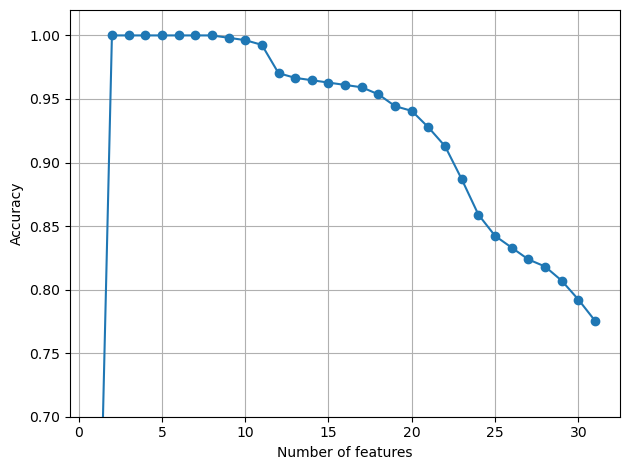

In [30]:


X, y = df.iloc[:, np.r_[0:4,8,10:13,15:18,21:26, 31:39, 42:44, 45:50]].values, df.iloc[:, 44].values

y = y.round()

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()



In [32]:
k3 = list(sbs.subsets_[12])
print(X_df.columns[0:][k3])
column_dict = {idx: col_name for idx, col_name in enumerate(X_df.columns)}
print("Column names dictionary:")
print(column_dict)

Index(['when', 'place', 'division', 'who', 'hurdless', 'dog', 'temp_c',
       'wind_kph', 'wind_degree', 'wind_dir', 'will_it_rain', 'chance_of_rain',
       'humidity', 'datum', 'L_count', 'T_count', 'W_max', 'wind_kphcl',
       'humcl'],
      dtype='object')
Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'ivar', 5: 'chip_szam', 6: 'ulna_hossz', 7: 'ugrasi_magassag', 8: 'name', 9: 'running', 10: 'WLT', 11: 'total', 12: 'hurdless', 13: 'colour', 14: 'dog', 15: 'start', 16: 'temp_c', 17: 'wind_kph', 18: 'wind_degree', 19: 'wind_dir', 20: 'will_it_rain', 21: 'chance_of_rain', 22: 'humidity', 23: 'datum', 24: 'L_count', 25: 'T_count', 26: 'W_max', 27: 'dogcl', 28: 'wind_kphcl', 29: 'temp_ccl', 30: 'humcl'}


In [33]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9191825359962843
Test accuracy: 0.8387445887445888


In [34]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.988388295401765
Test accuracy: 0.9642857142857143


 1) W_max                          0.271168
 2) L_count                        0.103817
 3) when                           0.094101
 4) datum                          0.083657
 5) division                       0.066780
 6) who                            0.061452
 7) hurdless                       0.042964
 8) place                          0.034424
 9) total                          0.031380
10) temp_c                         0.025201
11) dog                            0.019434
12) humidity                       0.019048
13) wind_degree                    0.017753
14) wind_dir                       0.017034
15) wind_kph                       0.016893
16) name                           0.013475
17) ulna_hossz                     0.012235
18) chip_szam                      0.009627
19) humcl                          0.009205
20) dogcl                          0.008625
21) temp_ccl                       0.008541
22) wind_kphcl                     0.006303
23) ugrasi_magassag             

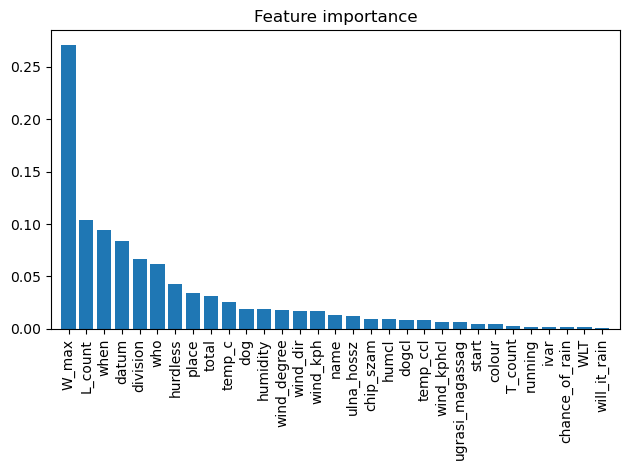

In [36]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_df.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [37]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.025, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 10


In [38]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) W_max                          0.271168
 2) L_count                        0.103817
 3) when                           0.094101
 4) datum                          0.083657
 5) division                       0.066780
 6) who                            0.061452
 7) hurdless                       0.042964
 8) place                          0.034424
 9) total                          0.031380
10) temp_c                         0.025201


__W_Max__

In [50]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

column_dict = {idx: col_name for idx, col_name in enumerate(df.columns)}
print("Column names dictionary:")
print(column_dict)

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'felvezeto', 5: 'nev', 6: 'fajta', 7: 'nem', 8: 'ivar', 9: 'szuletesi_datum', 10: 'chip_szam', 11: 'ulna_hossz', 12: 'ugrasi_magassag', 13: 'ivarlabel', 14: 'chip_szamlabel', 15: 'name', 16: 'running', 17: 'WLT', 18: 'dtime', 19: 'run', 20: 'withwho', 21: 'total', 22: 'hurdless', 23: 'colour', 24: 'dog', 25: 'start', 26: 'colourlabel', 27: 'WLTlabel', 28: 'namelabel', 29: 'wholabel', 30: 'time', 31: 'temp_c', 32: 'wind_kph', 33: 'wind_degree', 34: 'wind_dir', 35: 'will_it_rain', 36: 'chance_of_rain', 37: 'humidity', 38: 'datum', 39: 'datumlabel', 40: 'wind_dirlabel', 41: 'placelabel', 42: 'L_count', 43: 'T_count', 44: 'W_count', 45: 'W_max', 46: 'dogcl', 47: 'wind_kphcl', 48: 'temp_ccl', 49: 'humcl', 50: 'whenlabel', 51: 'Category'}


In [51]:
Z=df.iloc[:, np.r_[0:4,8,10:13,15:18,21:26, 31:39, 42:45, 46:50]]

#excluded: W_count and all categorical data

X_df = pd.DataFrame(Z)

column_dict = {idx: col_name for idx, col_name in enumerate(X_df.columns)}
print("Column names dictionary:")
print(column_dict)

Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'ivar', 5: 'chip_szam', 6: 'ulna_hossz', 7: 'ugrasi_magassag', 8: 'name', 9: 'running', 10: 'WLT', 11: 'total', 12: 'hurdless', 13: 'colour', 14: 'dog', 15: 'start', 16: 'temp_c', 17: 'wind_kph', 18: 'wind_degree', 19: 'wind_dir', 20: 'will_it_rain', 21: 'chance_of_rain', 22: 'humidity', 23: 'datum', 24: 'L_count', 25: 'T_count', 26: 'W_count', 27: 'dogcl', 28: 'wind_kphcl', 29: 'temp_ccl', 30: 'humcl'}


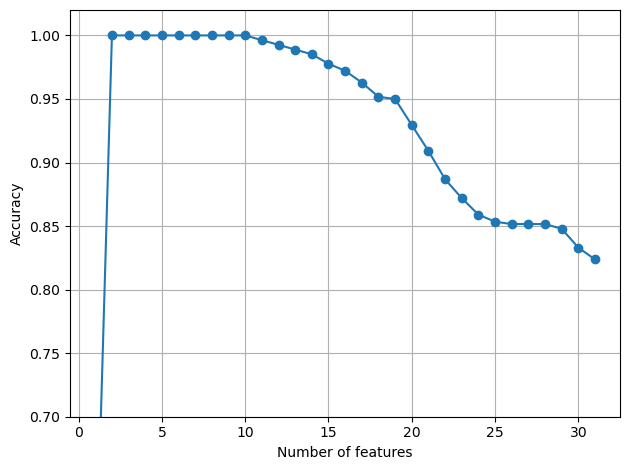

In [52]:


X, y = df.iloc[:, np.r_[0:4,8,10:13,15:18,21:26, 31:39, 42:45, 46:50]].values, df.iloc[:, 45].values

y = y.round()

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()


In [53]:
k3 = list(sbs.subsets_[12])
print(X_df.columns[0:][k3])
column_dict = {idx: col_name for idx, col_name in enumerate(X_df.columns)}
print("Column names dictionary:")
print(column_dict)

Index(['when', 'place', 'division', 'who', 'ulna_hossz', 'hurdless', 'dog',
       'temp_c', 'wind_kph', 'wind_degree', 'wind_dir', 'humidity', 'datum',
       'L_count', 'T_count', 'W_count', 'dogcl', 'temp_ccl', 'humcl'],
      dtype='object')
Column names dictionary:
{0: 'when', 1: 'place', 2: 'division', 3: 'who', 4: 'ivar', 5: 'chip_szam', 6: 'ulna_hossz', 7: 'ugrasi_magassag', 8: 'name', 9: 'running', 10: 'WLT', 11: 'total', 12: 'hurdless', 13: 'colour', 14: 'dog', 15: 'start', 16: 'temp_c', 17: 'wind_kph', 18: 'wind_degree', 19: 'wind_dir', 20: 'will_it_rain', 21: 'chance_of_rain', 22: 'humidity', 23: 'datum', 24: 'L_count', 25: 'T_count', 26: 'W_count', 27: 'dogcl', 28: 'wind_kphcl', 29: 'temp_ccl', 30: 'humcl'}


In [54]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.931723176962378
Test accuracy: 0.8722943722943723


In [55]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9712029725963771
Test accuracy: 0.9577922077922078


 1) W_count                        0.258671
 2) when                           0.100160
 3) L_count                        0.092974
 4) datum                          0.082568
 5) division                       0.060254
 6) who                            0.057169
 7) place                          0.041134
 8) hurdless                       0.039639
 9) total                          0.031101
10) wind_kph                       0.030532
11) wind_degree                    0.027066
12) temp_c                         0.024891
13) wind_dir                       0.020892
14) humidity                       0.019461
15) dog                            0.018681
16) wind_kphcl                     0.015286
17) ulna_hossz                     0.010596
18) name                           0.010423
19) chip_szam                      0.009723
20) humcl                          0.009667
21) temp_ccl                       0.008401
22) dogcl                          0.005972
23) ugrasi_magassag             

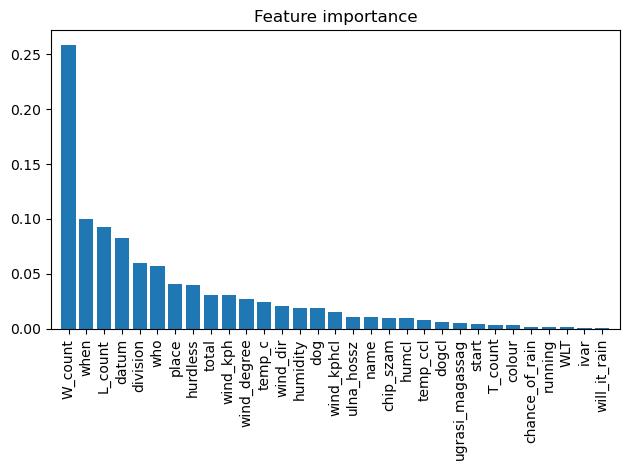

In [56]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_df.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [57]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.025, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 11


In [59]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) W_count                        0.258671
 2) when                           0.100160
 3) L_count                        0.092974
 4) datum                          0.082568
 5) division                       0.060254
 6) who                            0.057169
 7) place                          0.041134
 8) hurdless                       0.039639
 9) total                          0.031101
10) wind_kph                       0.030532
11) wind_degree                    0.027066


In [60]:
df.to_csv('04.elemzett_joined_versenyadatok.temp2.csv', sep=';', index=False)  

In [61]:
selected_features = ['who','division','place','L_count','T_count','W_count','W_max','hurdless','when',
                    'datum','total','wind_dir','name','start','division','temp_c',
                    'run','wind_kph','dog','wind_degree']
other_features = ['WLT','datum']
categorical_features = ['namelabel', 'wholabel','WLTlabel','datumlabel','wind_dirlabel','placelabel','whenlabel']
selected_columns = list(set(selected_features).union(set(other_features)).union(set(categorical_features)))

In [62]:
dataf = df[selected_columns]
dataf = dataf.sort_values(by='when')

In [64]:
dataf.shape
dataf.columns
column_dict = {idx: col_name for idx, col_name in enumerate(dataf.columns)}
print("Column names dictionary:")
print(column_dict)

Column names dictionary:
{0: 'place', 1: 'wind_degree', 2: 'wind_kph', 3: 'whenlabel', 4: 'datum', 5: 'total', 6: 'who', 7: 'start', 8: 'T_count', 9: 'run', 10: 'wind_dirlabel', 11: 'wind_dir', 12: 'when', 13: 'namelabel', 14: 'placelabel', 15: 'division', 16: 'wholabel', 17: 'datumlabel', 18: 'name', 19: 'W_max', 20: 'W_count', 21: 'L_count', 22: 'temp_c', 23: 'WLTlabel', 24: 'dog', 25: 'WLT', 26: 'hurdless'}


In [65]:
dataf.to_csv('04.elemzett_joined_versenyadatok.temp3.csv', sep=';', index=False)  